## Clean Kaggle Data
### converting strings to correct data

In [1]:
import json
import pandas as pd
import numpy as np
import re

In [2]:
kaggle_metadata = pd.read_csv('../movies_metadata.csv', low_memory=False)
ratings = pd.read_csv('../ratings.csv')

In [3]:
kaggle_metadata.sample(n=2)

,adult,belongs_to_collection,budget,genres,homepage,id,imdb_id,original_language,original_title,overview,...,release_date,revenue,runtime,spoken_languages,status,tagline,title,video,vote_average,vote_count
11185,False,NaN,0,"[{'id': 28, 'name': 'Action'}, {'id': 12, 'nam...",NaN,26718,tt0026393,en,G-Men,"James ""Brick"" Davis, a struggling attorney, ow...",...,1935-05-04,0.0,85.0,"[{'iso_639_1': 'en', 'name': 'English'}]",Released,Hollywood's Most Famous Bad Man Joins the,G-Men,False,5.8,14.0
25421,False,NaN,0,"[{'id': 99, 'name': 'Documentary'}]",http://www.goodcopybadcopy.net/,22285,tt1782451,en,Good Copy Bad Copy,Good Copy Bad Copy is a documentary about copy...,...,2007-01-01,0.0,59.0,"[{'iso_639_1': 'en', 'name': 'English'}]",Released,NaN,Good Copy Bad Copy,False,7.2,8.0


In [4]:
ratings.sample(n=5)

,userId,movieId,rating,timestamp
16139595,167850,2011,3.5,1258049762
2366255,24494,44,3.0,833178730
18383705,190798,72998,4.5,1370390374
659772,6716,1208,5.0,939028015
12124154,125747,3984,3.0,1105472023


In [5]:
kaggle_metadata.dtypes

adult                     object
belongs_to_collection     object
budget                    object
genres                    object
homepage                  object
id                        object
imdb_id                   object
original_language         object
original_title            object
overview                  object
popularity                object
poster_path               object
production_companies      object
production_countries      object
release_date              object
revenue                  float64
runtime                  float64
spoken_languages          object
status                    object
tagline                   object
title                     object
video                     object
vote_average             float64
vote_count               float64
dtype: object

## The correct type

1. Budget : numeric
2. ID : numeric
3. popularity: numeric
4. adult: Boolean
5. release_date: datetime
6. video: Boolean

In [6]:
kaggle_metadata['adult'].value_counts()

False                                                                                                                             45454
True                                                                                                                                  9
 - Written by Ørnås                                                                                                                   1
 Rune Balot goes to a casino connected to the October corporation to try to wrap up her case once and for all.                        1
 Avalanche Sharks tells the story of a bikini contest that turns into a horrifying affair when it is hit by a shark avalanche.        1
Name: adult, dtype: int64

### Remove Bad Data

In [7]:
# keep rows where the adult column is False, and then drop the adult column.
kaggle_metadata = kaggle_metadata[kaggle_metadata['adult'] == 'False'].drop('adult',axis='columns')

### Convert Data Types

In [8]:
kaggle_metadata['video'].dtype

dtype('O')

In [9]:
kaggle_metadata['video'].value_counts()

False    45358
True        93
Name: video, dtype: int64

In [10]:
# creates the Boolean column we want.
kaggle_metadata['video'] == 'True'

0        False
1        False
2        False
3        False
4        False
         ...  
45461    False
45462    False
45463    False
45464    False
45465    False
Name: video, Length: 45454, dtype: bool

In [11]:
# assign it back to the video column
kaggle_metadata['video'] = kaggle_metadata['video'] == 'True'

In [12]:
kaggle_metadata['video'].dtype

dtype('bool')

In [13]:
kaggle_metadata['video'].value_counts()

False    45454
Name: video, dtype: int64

In [14]:
kaggle_metadata['budget'] = kaggle_metadata['budget'].astype(int)
kaggle_metadata['id'] = pd.to_numeric(kaggle_metadata['id'], errors='raise')
kaggle_metadata['popularity'] = pd.to_numeric(kaggle_metadata['popularity'], errors='raise')

In [15]:
kaggle_metadata['release_date'] = pd.to_datetime(kaggle_metadata['release_date'])

# Reasonability Checks on Ratings Data

In [16]:
ratings.info(null_counts = True)

/Users/bibowang/opt/anaconda3/envs/PythonData/lib/python3.7/site-packages/ipykernel_launcher.py:1: FutureWarning: null_counts is deprecated. Use show_counts instead
  """Entry point for launching an IPython kernel.


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 26024289 entries, 0 to 26024288
Data columns (total 4 columns):
 #   Column     Non-Null Count     Dtype  
---  ------     --------------     -----  
 0   userId     26024289 non-null  int64  
 1   movieId    26024289 non-null  int64  
 2   rating     26024289 non-null  float64
 3   timestamp  26024289 non-null  int64  
dtypes: float64(1), int64(3)
memory usage: 794.2 MB


In [17]:
pd.to_datetime(ratings['timestamp'], unit='s')

0          2015-03-09 22:52:09
1          2015-03-09 23:07:15
2          2015-03-09 22:52:03
3          2015-03-09 22:52:26
4          2015-03-09 22:52:36
                   ...        
26024284   2009-10-31 23:26:04
26024285   2009-10-31 23:33:52
26024286   2009-10-31 23:29:24
26024287   2009-11-01 00:06:30
26024288   2009-10-31 23:30:58
Name: timestamp, Length: 26024289, dtype: datetime64[ns]

In [18]:
ratings.head()

,userId,movieId,rating,timestamp
0,1,110,1.0,1425941529
1,1,147,4.5,1425942435
2,1,858,5.0,1425941523
3,1,1221,5.0,1425941546
4,1,1246,5.0,1425941556


In [19]:
ratings['timestamp'] = pd.to_datetime(ratings['timestamp'], unit='s')
ratings.head()

,userId,movieId,rating,timestamp
0,1,110,1.0,2015-03-09 22:52:09
1,1,147,4.5,2015-03-09 23:07:15
2,1,858,5.0,2015-03-09 22:52:03
3,1,1221,5.0,2015-03-09 22:52:26
4,1,1246,5.0,2015-03-09 22:52:36


### Statistics Data check- histogram
Using A histogram to get a sense of how a dataset is distributed.

count    2.602429e+07
mean     3.528090e+00
std      1.065443e+00
min      5.000000e-01
25%      3.000000e+00
50%      3.500000e+00
75%      4.000000e+00
max      5.000000e+00
Name: rating, dtype: float64

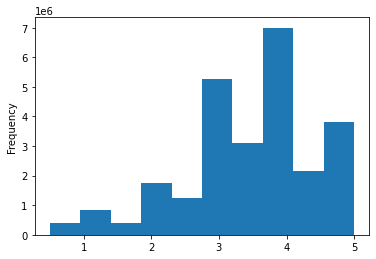

In [20]:
ratings['rating'].plot(kind='hist')
ratings['rating'].describe()

count          26,024,289.00
mean                    3.53
std                     1.07
min                     0.50
25%                     3.00
50%                     3.50
75%                     4.00
max                     5.00
Name: rating, dtype: float64

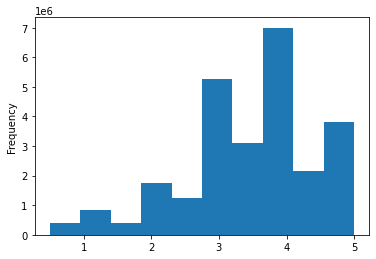

In [21]:
pd.options.display.float_format = '{:20,.2f}'.format
ratings['rating'].plot(kind='hist')
ratings['rating'].describe()

In [22]:
kaggle_metadata.dtypes

belongs_to_collection            object
budget                            int64
genres                           object
homepage                         object
id                                int64
imdb_id                          object
original_language                object
original_title                   object
overview                         object
popularity                      float64
poster_path                      object
production_companies             object
production_countries             object
release_date             datetime64[ns]
revenue                         float64
runtime                         float64
spoken_languages                 object
status                           object
tagline                          object
title                            object
video                              bool
vote_average                    float64
vote_count                      float64
dtype: object

In [23]:
kaggle_metadata['video'].dtypes

dtype('bool')

In [24]:
kaggle_metadata['video'].value_counts()

False    45454
Name: video, dtype: int64